In [1]:
# Data management
import pandas as pd
import numpy as np
# Import modules
import sys
sys.path.append(r"src/") 
sys.path.append(r"sql_scripts/") 
import src.Explore as ex
import src.LoadQuery as qr




In [ ]:
#Extract and transform datasource

#!python src/ExtractTransform.py

In [ ]:
#Load Extracted and transformed datasource to MySQL server

#!python src/Load.py

In [2]:
df = pd.read_csv("data\glassdoor_tableau.csv", index_col=0)

In [3]:
ex.summary_statistics(df)

,null_%,null_count,dtype,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,,,,
overall_rating,0.00,0,int64,838566.0,3.66,1.17,1.00,3.00,4.00,5.00,5.00
comp_benefits,0.18,150082,float64,688484.0,3.40,1.22,1.00,3.00,3.00,4.00,5.00
cons_compound,0.00,8,float64,838558.0,-0.07,0.42,-1.00,-0.36,0.00,0.15,1.00
pros_compound,0.00,0,float64,838566.0,0.60,0.31,-1.00,0.44,0.68,0.84,1.00
headline_compound,0.00,2219,float64,836347.0,0.22,0.34,-0.97,0.00,0.08,0.51,0.99
senior_mgmt,0.19,155876,float64,682690.0,3.18,1.33,1.00,2.00,3.00,4.00,5.00
pros_cons_gap,0.00,8,float64,838558.0,0.67,0.50,-1.97,0.35,0.70,1.00,1.99
overall_compound_rating,0.17,142216,float64,696350.0,3.40,1.04,1.00,2.75,3.50,4.20,5.00
culture_values,0.23,191373,float64,647193.0,3.59,1.32,1.00,3.00,4.00,5.00,5.00


In [65]:
#Which are the most consistent companies in terms of overall rating?
#How did the top 5 perform over the years?

rank_df = qr.query_server(open(r"sql_scripts\ranking.sql").read())
rank_df

,firm,rank_1,rank_2,rank_3,mean_overall_rating
0,Bain-and-Company,6.0,0.0,1.0,4.581514
1,Google,4.0,5.0,0.0,4.304956
2,Apple,2.0,2.0,1.0,3.835480
3,LinkedIn,1.0,0.0,2.0,4.486967
4,Taylor-Wimpey,1.0,0.0,0.0,4.701600
5,SAP,0.0,2.0,0.0,4.211500
6,EY,0.0,1.0,1.0,3.596850
7,American-Express,0.0,1.0,0.0,3.566300
8,University-of-Michigan,0.0,1.0,0.0,4.174800
9,Rentokil-Initial,0.0,1.0,0.0,4.445500


In [21]:
stopwords = ["lot","and","with","there","of","the","for","in","it","that","is","a","you","can","on","if","to"]

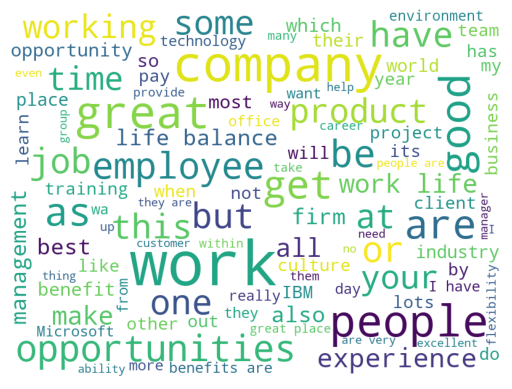

In [22]:
ex.wordcloud_plot(df[df["date_review"].apply(lambda x: x[:4]) == "2008"]["pros"],stopwords);

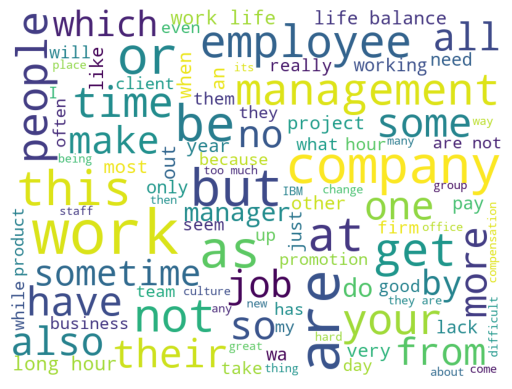

In [24]:
ex.wordcloud_plot(df[df["date_review"].apply(lambda x: x[:4]) == "2008"]["cons"],stopwords);

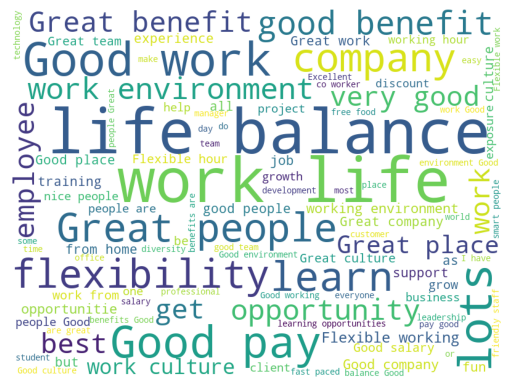

In [25]:
ex.wordcloud_plot(df[df["date_review"].apply(lambda x: x[:4]) == "2020"]["pros"],stopwords);

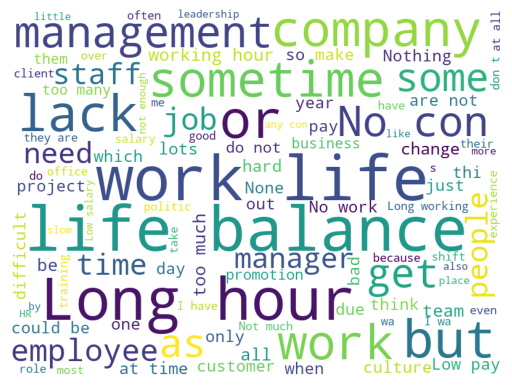

In [26]:
wordcloud_plot(df[df["date_review"].apply(lambda x: x[:4]) == "2020"]["cons"],stopwords);

In [27]:
%%html

<div class='tableauPlaceholder' id='viz1677251321754' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UK&#47;UK_jobs_sentiment&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UK_jobs_sentiment&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UK&#47;UK_jobs_sentiment&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='es-ES' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1677251321754');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1200px';vizElement.style.height='1027px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1200px';vizElement.style.height='1027px';} else { vizElement.style.width='100%';vizElement.style.height='1277px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [34]:
%%html

<div class='tableauPlaceholder' id='viz1677497067918' style='position: relative'><noscript><a href='#'><img alt='Glassdoor UK Review Analysis - 2008&#47;2021 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UK&#47;UK_jobs_sentiment&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;UK_jobs_sentiment&#47;Story1?:language=es-ES&amp;:embed=true' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UK&#47;UK_jobs_sentiment&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='es-ES' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1677497067918');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1200px';vizElement.style.height='1127px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>